# **Modeling Homework #1**
### **Created by Zoe Flanzer**

In this notebook, I will:
* Code a one-dimensional Random Walk Model
  * Plot the location of the random walkers
  * Create a histogram of the position and frequency of random walkers
* Code a two-dimensional Random Walk Model
  * Create one plot showing the position of all three random walkers at each step of their random walks



## Part 1

### Import required libraries and define key variables

In [43]:
# Importing required python libraries

import numpy as np # used for numerical operations
import matplotlib.pyplot as plt # used for plotting


In [44]:
# Defining variables that will be used throughout this notebook

Nt = 200 # number of steps in the random walk
mu_x = 1.5 # average step size in the random walk
s_x = 2.1 # standard deviation of step size in random walk
min_x = 1.25 # minimum step size in random walk

### First Random Walk Model:

This section of code is from the first part of the example notebook. It was left here for future reference, but uses the given homework variables.

In [45]:
# Creating a container variable to store the position of the random walker sat each time step

x = np.zeros(Nt)

# Create for-loop to loop through the number of time steps, generate random step sizes, and calculate the new position of each time step

for i in np.arange(Nt):
  x_i = s_x*np.random.randn() + mu_x # Calculated the step size of i and adding mu_x so that the mean in 0.75 and not 0

  if(i==0):
    x[i] = 0.0 + x_i # new position is 0.0 (first step) plus the random step size
  else:
    x[i] = x[i-1] + x_i # next time step is the previous position plus the random step size

Text(0, 0.5, 'Distance Traveled [m]')

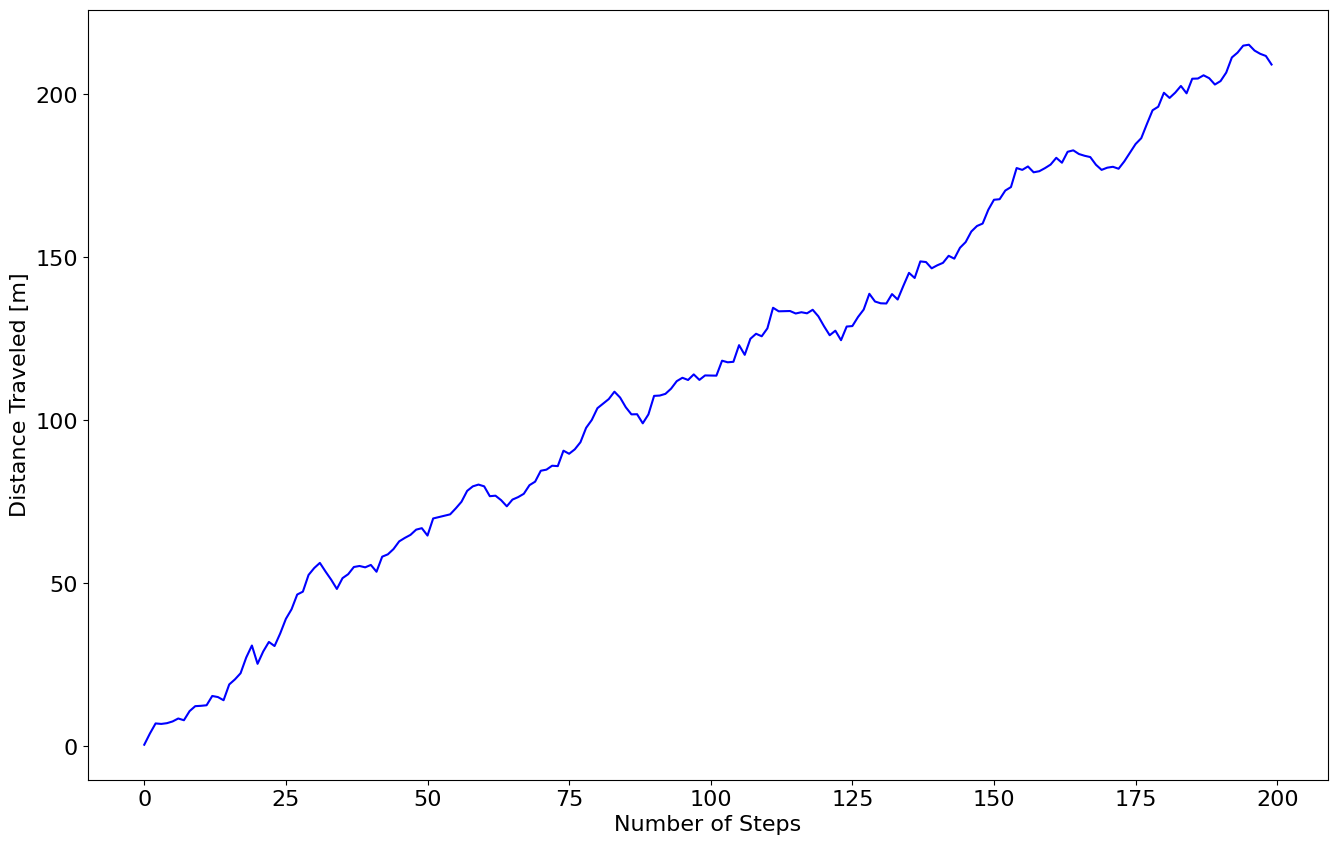

In [46]:
# Plotting the model results

plt.rcParams.update({'font.size': 16}) # setting font size

plt.figure(figsize=(16,10)) # creating the figure and making it 16" wide and 10" tall
plt.plot(np.arange(Nt),x,'b-') # plotting x vs i (with np.arange(Nt)) as a blue line
plt.xlabel('Number of Steps') # labeling x-axis
plt.ylabel('Distance Traveled [m]') # labeling y-axis

### Second Random Walk Model

This includes the commented code for the random walk model in Part 1 of the homework as well as the plot-deliverables for Part 1.

In [47]:
Nx = 1000 # initializing the number of walkers

X = np.zeros((Nt,Nx)) # creating a new container for all walkers at each time step on x-axis. corresponds to array of zeros w/ Nt rows (specific time step) and Nx columns(# of walkers).

 # creating a loop for each time step
for i in np.arange(Nt):

  # for-loop loops through each walker and is 'nested' within the time for-loop
  for j in np.arange(Nx):
    x_i = s_x * np.random.randn() + mu_x # calculates the random step size for the jth walker at the ith time step
    while x_i < min_x: # adding while loop to make sure all step sizes are above min
      x_i = s_x * np.random.randn() + mu_x # while x_i is less than min_x, it'll keep generating numbers
    if(i==0):
      X[i,j] = 0.0 + x_i # new position is 0.0 (first step) plus the random step size
    else:
      X[i,j] = X[i-1,j] + x_i # next time step is the previous position plus the random step size

Text(0, 0.5, 'Distance Traveled [m]')

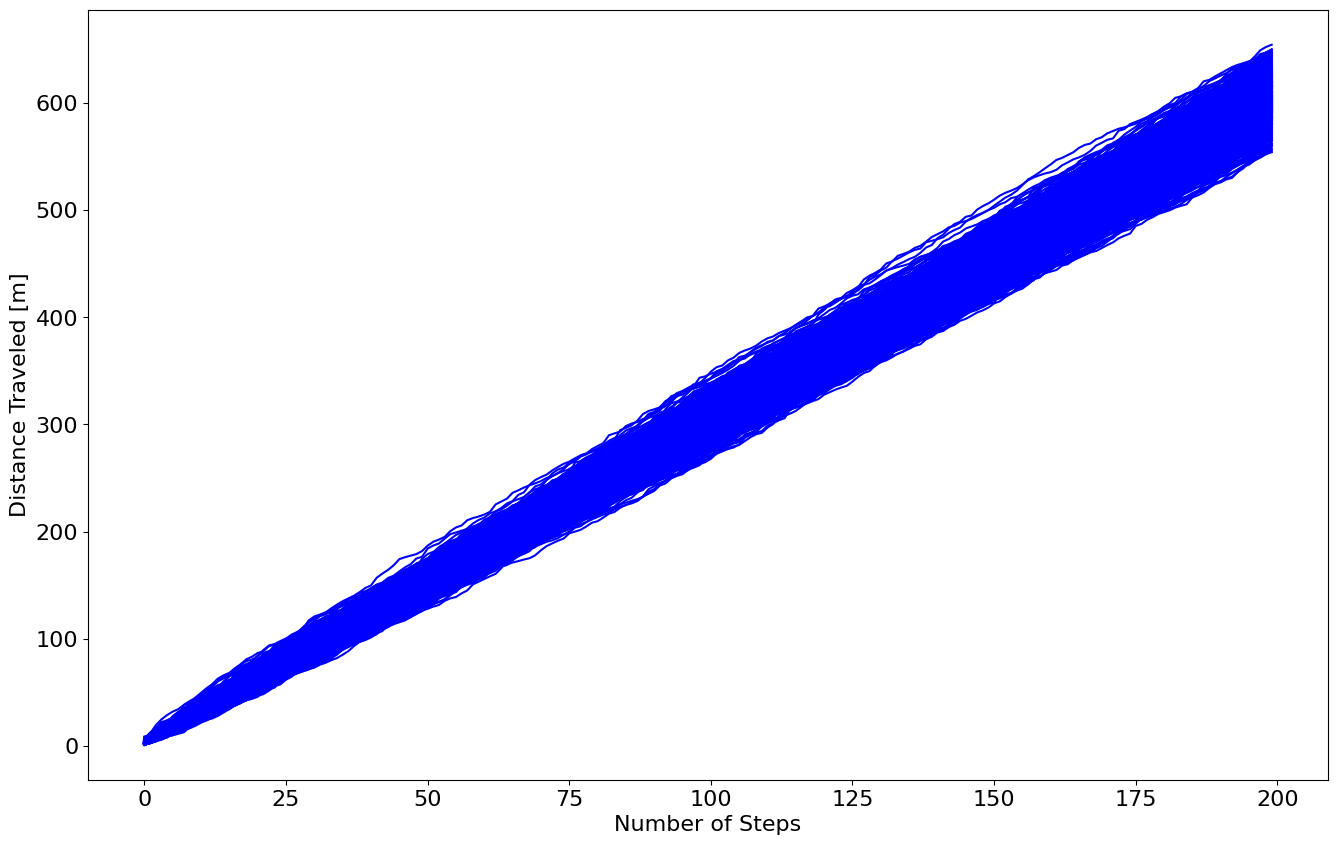

In [48]:
# Plotting the multi-walker Random Walk

plt.figure(figsize=(16,10)) # creating the figure and making it 16" wide and 10" tall

plt.plot(np.arange(Nt),X,'b-') # plotting all walkers vs time as a blue line
plt.xlabel('Number of Steps') # labeling x-axis
plt.ylabel('Distance Traveled [m]') # labeling y-axis


#### Calculating basic statistics

Text(0, 0.5, 'Standard Deviation Distance Traveled [m]')

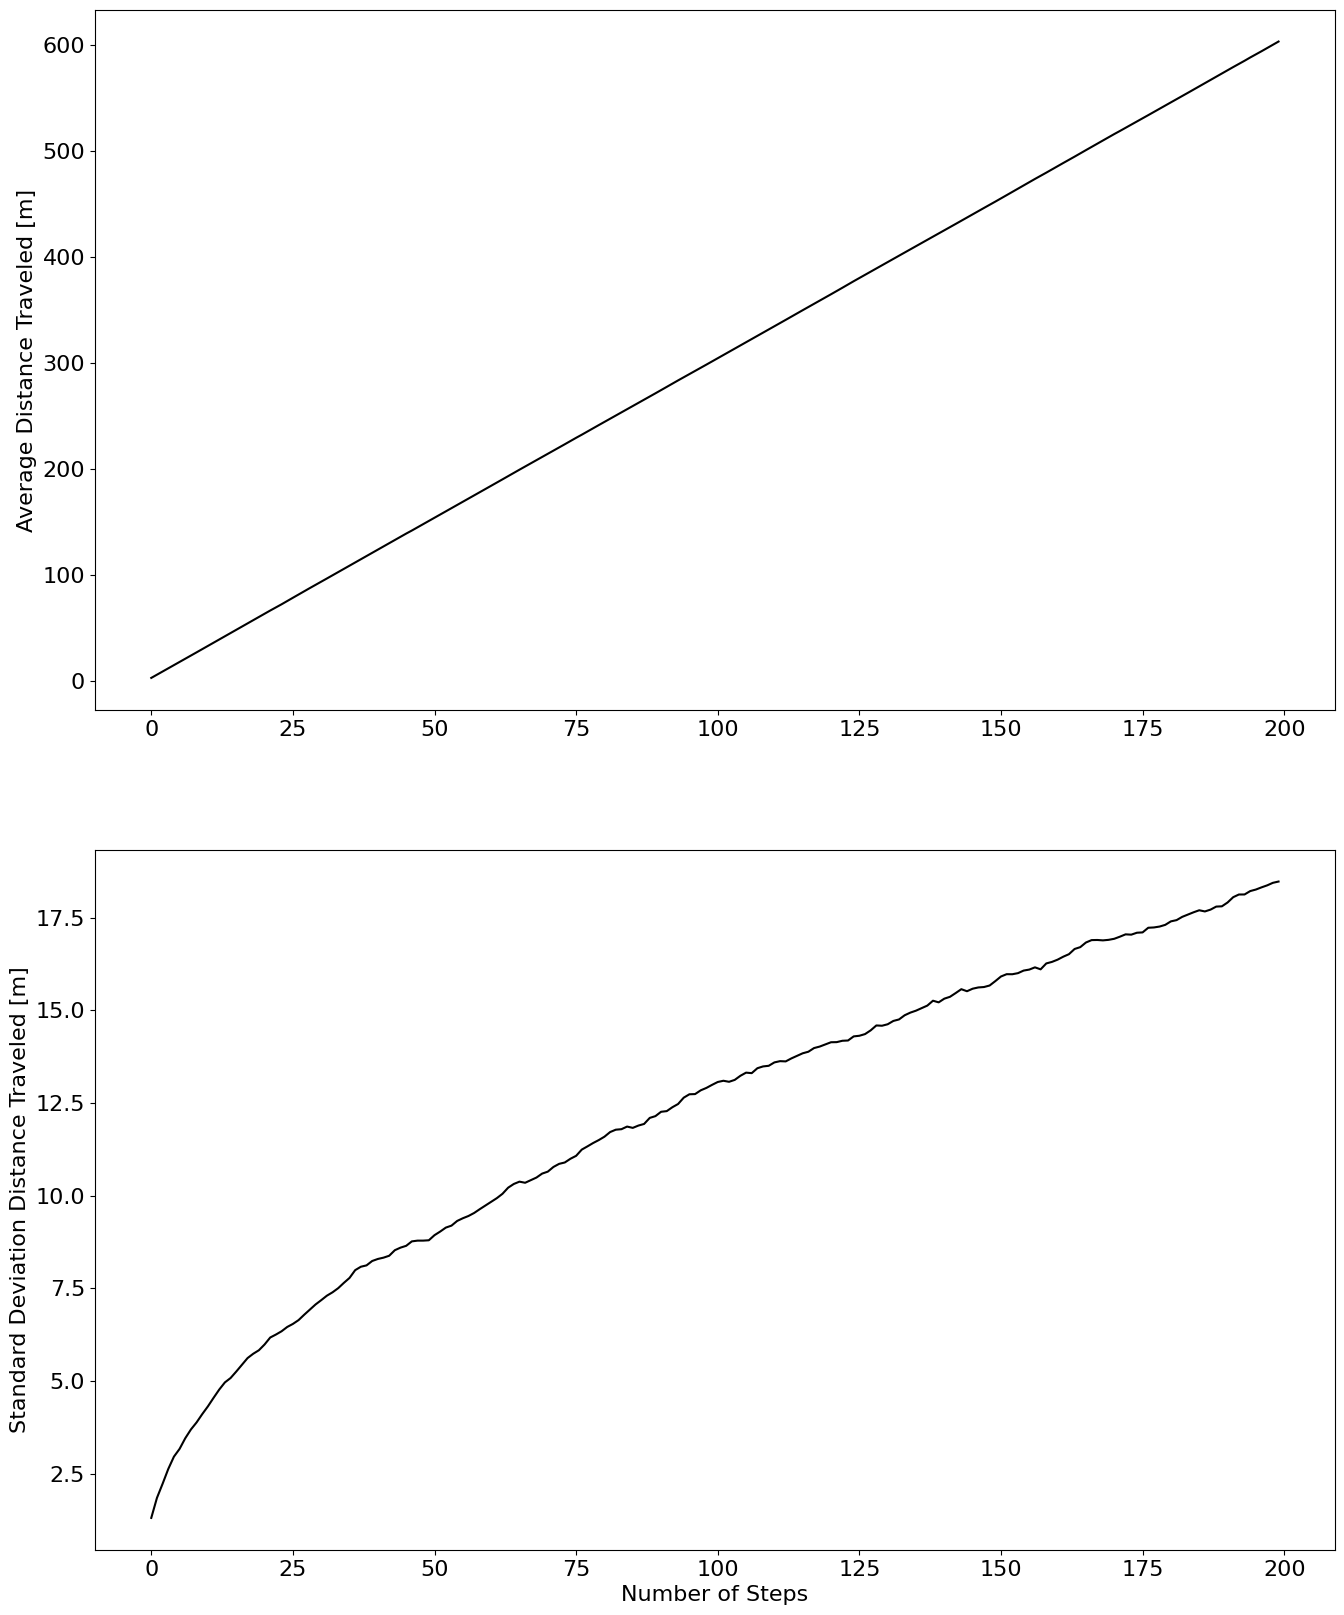

In [49]:
mean_X = np.mean(X,axis=1) # calculating the average distance of all walkers through time
std_X = np.std(X,axis=1) # calculating the standard deviation of all walkers through time

plt.figure(figsize=(16,20)) # creating a new figure and defining its size
plt.subplot(2,1,1) # creating a subplot that is 2 rows x 1 column and call the first plot
plt.plot(np.arange(Nt),mean_X,'k-') # plot the mean position as a black line
plt.ylabel('Average Distance Traveled [m]') # label the y-axis

plt.subplot(2,1,2) # creating a subplot that is 2 rows x 1 column and call the second plot
plt.plot(np.arange(Nt),std_X,'k-') # plot the standard deviation as a black line
plt.xlabel('Number of Steps') # labeling the x-axis
plt.ylabel('Standard Deviation Distance Traveled [m]') # labeling the y-axis (for both subplots)

#### Plots

These cells include the deliverables for part 1.

Text(0, 0.5, 'Distance Traveled [m]')

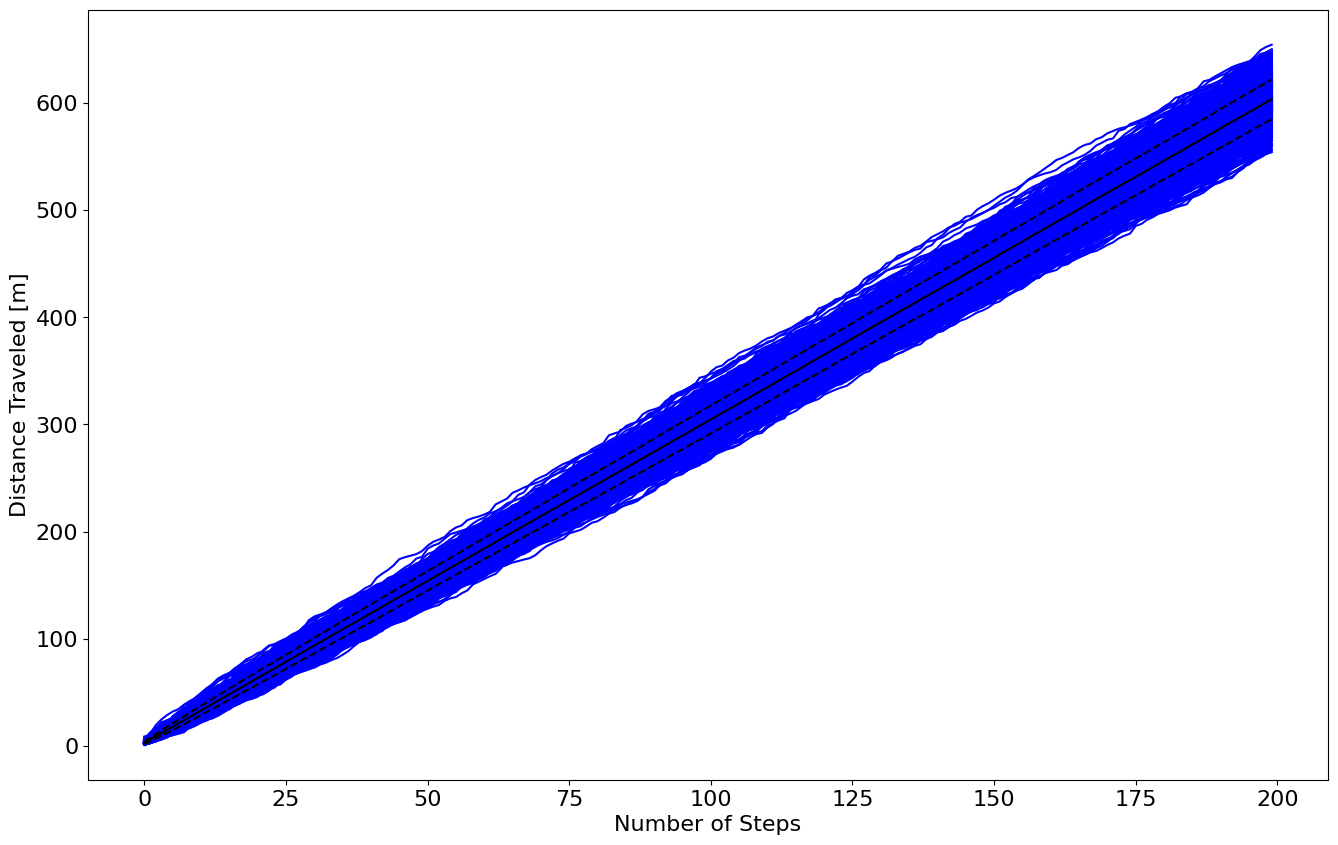

In [50]:
plt.figure(figsize=(16,10)) # creating a new figure that is 16" wide and 10" tall

plt.plot(np.arange(Nt),X,'b-') # plotting the walkers by steps
plt.plot(np.arange(Nt),mean_X,'k-') # plotting the average position in black
plt.plot(np.arange(Nt), mean_X + std_X, 'k--') # plotting the standard deviation above the mean in a dashed black line
plt.plot(np.arange(Nt), mean_X - std_X, 'k--') # plotting the standard deviation below the mean in a dashed black line
plt.xlabel('Number of Steps') # labeling the x-axis
plt.ylabel('Distance Traveled [m]') # labeling the y-axis

Text(0.5, 0, 'Position [m]')

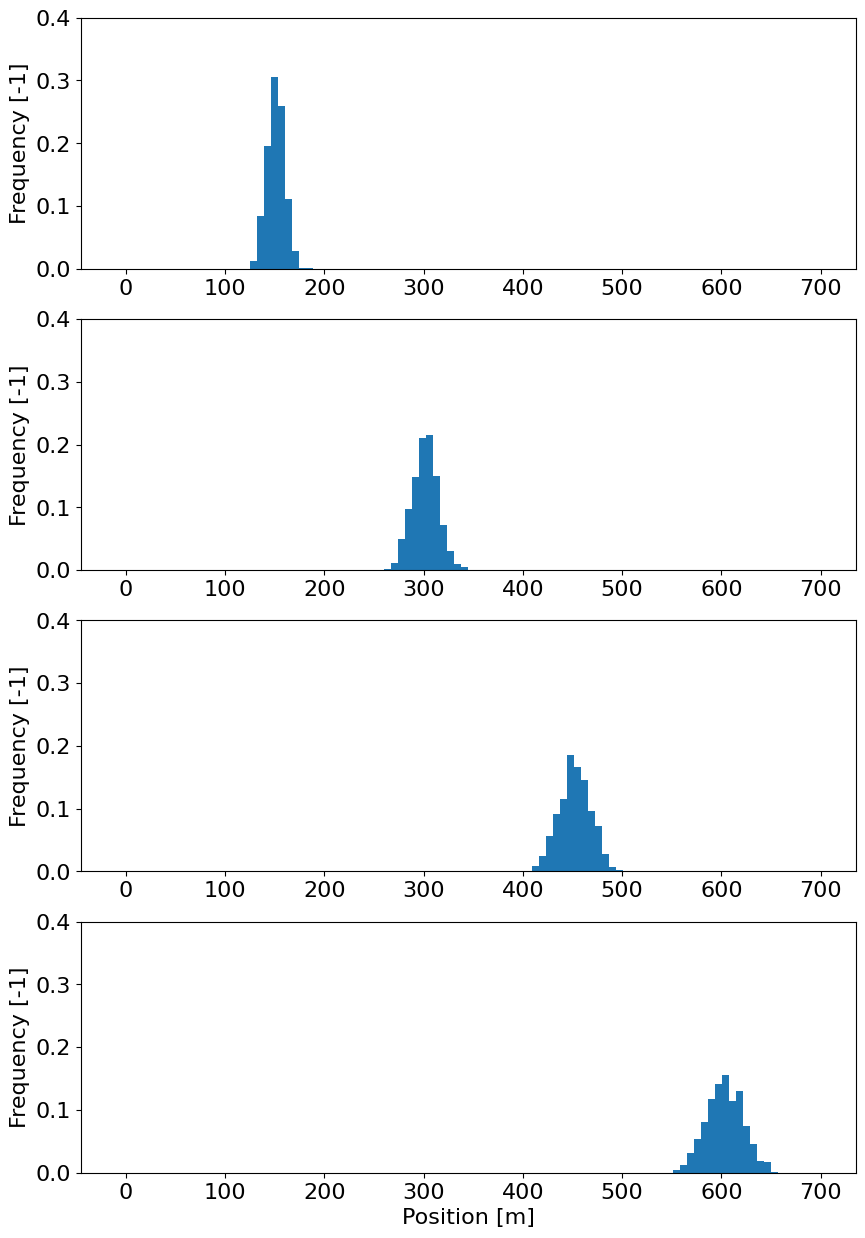

In [51]:
# Creating another figure
x_50, be_50 = np.histogram(X[49,:], bins=100, range=(-10.0,700)) # making a histogram of the 50th time steps and 40 bins with an x-axis range of -10 to 200
x_100, be_100 = np.histogram(X[99,:], bins=100, range=(-10.0,700)) # making a histogram with the 100th time steps and 40 bins with an x-axis range of -10 to 200
x_150, be_150 = np.histogram(X[149,:], bins=100, range=(-10.0,700)) # making a histogram with the 150th time steps and 40 bins with an x-axis range of -10 to 200
x_200, be_200 = np.histogram(X[-1,:], bins=100, range=(-10.0,700)) # making a histogram with last time steps and 40 bins with an x-axis range of -10 to 20

plt.figure(figsize=(10,15)) # creating a new figure that is 10" wide and 15" tall
plt.subplot(4,1,1) # calling the first plot of a subplot series that is 4 rows and 1 column
plt.bar((be_50[1:]+be_50[:-1])/2, (x_50/np.sum(x_50)), width=(be_50[1]-be_50[0])) # creating a bar chart of normalized bin frequencies (y-axis) by bin midpoint (x-axis) with bar widths equivalent to the width of each bin for the first histogram
plt.ylim(0.0,0.4) # setting the y-axis limit
plt.ylabel('Frequency [-1]') # labeling the y-axis

plt.subplot(4,1,2) # calling the second plot of the 4x1 subplots
plt.bar((be_100[1:]+be_100[:-1])/2, (x_100/np.sum(x_100)), width=(be_100[1]-be_100[0])) # creating a second bar chart (same parameters as the first) but for the second histogram's data
plt.ylim(0.0,0.4) # setting the y-axis limit
plt.ylabel('Frequency [-1]') # labeling the y-axis

plt.subplot(4,1,3) # calling the third plot of the 4x1 subplots
plt.bar((be_150[1:]+be_150[:-1])/2, (x_150/np.sum(x_150)), width=(be_150[1]-be_150[0])) # creating a third bar chart (same parameters as the first/second) but for the third histogram's data
plt.ylim(0.0,0.4) # setting the y-axis limit
plt.ylabel('Frequency [-1]') # labeling the y-axis

plt.subplot(4,1,4) # calling the fourth plot of the 4x1 subplots
plt.bar((be_200[1:]+be_200[:-1])/2, (x_200/np.sum(x_200)), width=(be_200[1]-be_200[0])) # creating a fourth bar chart (same parameters as the first/second/third) but for the fourth histogram's data
plt.ylim(0.0,0.4) # setting the y-axis limit
plt.ylabel('Frequency [-1]') # labeling the y-axis
plt.xlabel('Position [m]') # labeling the x-axis at the bottom of the subplots for all 4 subplots

## Part 2

### Defining variables

In [52]:
Nt = 300 # number of steps
Nx = 3 # number of walkers

mu_x = 0.5 # average step size on x-axis
s_x = 1.5 # standard deviation of step size on x-axis
mu_y = 5.0 # mean step size on y-axis
s_y = 2.5 # std. dev. step size on y-axis

### Coding two-dimensional Random Walk

In [53]:
X = np.zeros((Nt,Nx)) # creating a new container for all walkers at each time step. corresponds to array of zeros w/ Nt rows (specific time step) and Nx columns(# of walkers).
Y = np.zeros((Nt,Nx)) # creating a new container for all walkers at each time step. corresponds to array of zeros w/ Nt rows (specific time step) and Nx columns(# of walkers).

 # creating a loop for each time step
for i in np.arange(Nt):

  # for-loop loops through each walker and is 'nested' within the time for-loop
  for j in np.arange(Nx): # calculates the random step size for the jth walker at the ith time step
    x_i = s_x*np.random.randn() + mu_x
    y_i = s_y*np.random.randn() + mu_y
    if(i==0): # new position is 0.0 (first step) plus the random step size
      X[i,j] = 0.0 + x_i
      Y[i,j] = 0.0 + y_i
    else: # next time step is the previous position plus the random step size
      X[i,j] = X[i-1,j] + x_i
      Y[i,j] = Y[i-1,j] + y_i

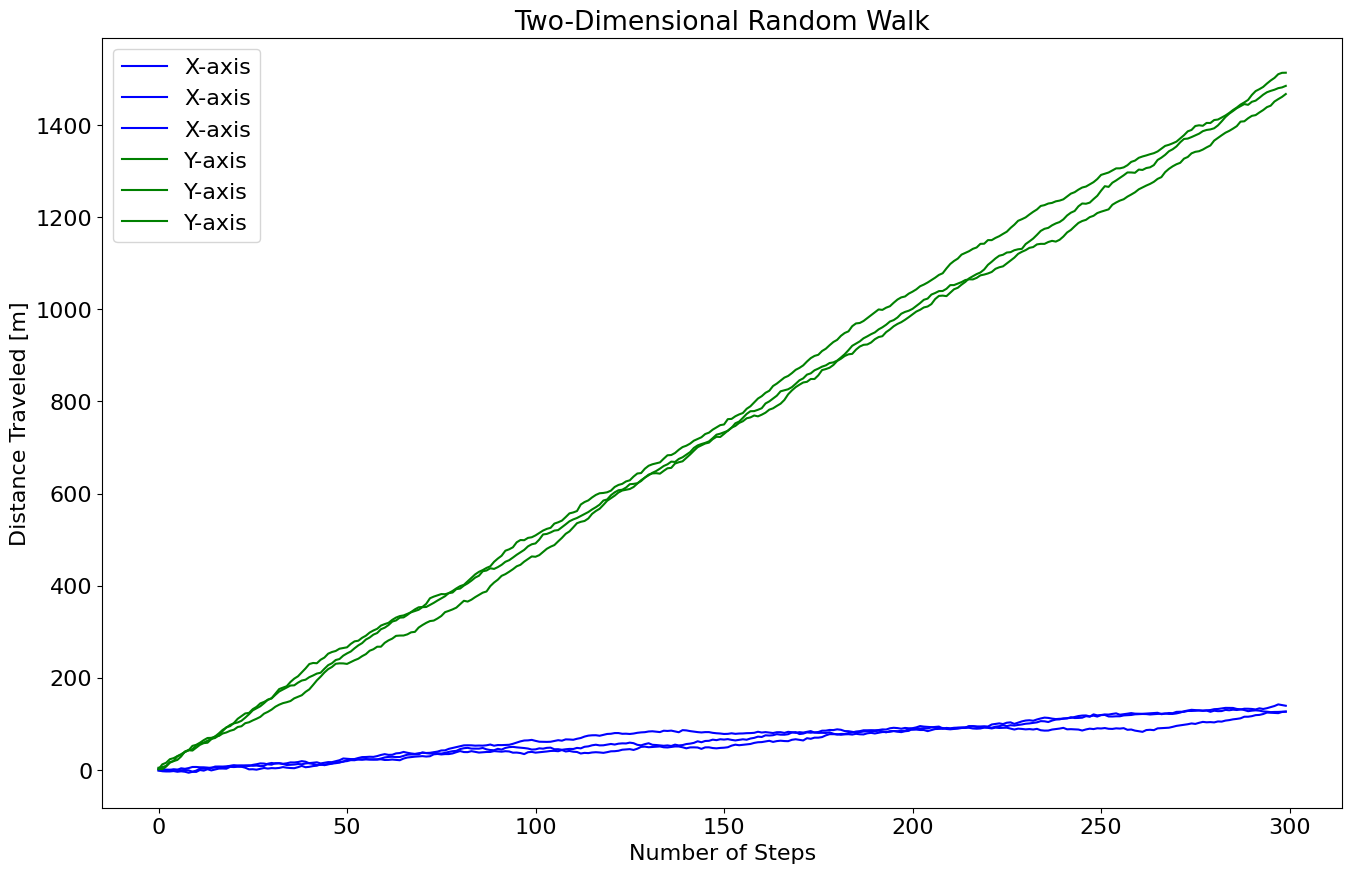

In [54]:
# Plotting the multi-walker Random Walk

plt.figure(figsize=(16,10)) # creating the figure and making it 16" wide and 10" tall

plt.plot(np.arange(Nt),X,'b-', label='X-axis') # plotting all x-axis walkers vs time as a blue line
plt.plot(np.arange(Nt),Y,'g-', label='Y-axis') # plotting all y-axis walkers vs time as a red line
plt.xlabel('Number of Steps') # labeling x-axis
plt.ylabel('Distance Traveled [m]') # labeling y-axis
plt.title('Two-Dimensional Random Walk') # labeling title
plt.legend()
